# Normal Distribution

In [1]:
# 1 Standard Deviation has Z-Score=1        Right Side
# 2 Standard Deviation has Z-Score=2        Right Side
# 3 Standard Deviation has Z-Score=3        Right Side

# mean has Z-Score=0

# 1 Standard Deviation has Z-Score=-1        Left Side
# 2 Standard Deviation has Z-Score=-2        Left Side
# 3 Standard Deviation has Z-Score=-3        Left Side


# 68% data fall in or found upto 1 Standard Deviation        Both Side
# 95% upto fall in or found upto 2 Standard Deviation        Both Side
# 99.7% upto fall in or found upto 3 Standard Deviation      Both Side

# Z-Score

In [ ]:
# Z - Score gives (Probability) result, But if u look for something less than take result as it is
# Z - Score gives (Probability) result, But if u look for something greater than take 1-result

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("weight-height.csv")

In [5]:
# Basic Info
df.Weight

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

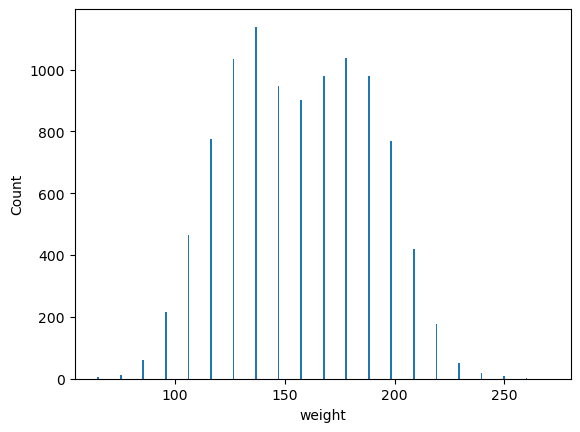

In [7]:
# Plot Weights
plt.hist(df.Weight,bins=20,width=0.8)
plt.xlabel('weight')
plt.ylabel('Count')
plt.show()

In [8]:
# See summary statistics
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

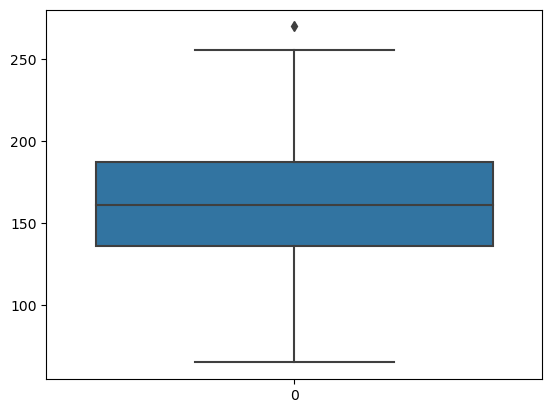

In [10]:
# Visualize Outliers
sns.boxplot(df['Weight'])
plt.show()

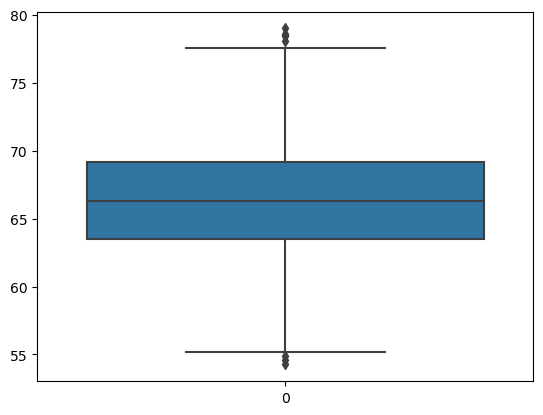

In [11]:
# since we are on outlier topic, also draw it for height
sns.boxplot(df['Height'])
plt.show()

### Finding and Removing Outliers

In [12]:
# Back to weight
#Get Outlier values
upper=df.Weight.mean()+3*df.Weight.std()
lower=df.Weight.mean()-3*df.Weight.std()

print(upper)
print(lower)

257.7656738523894
65.11503981327212


In [13]:
# Remove outlier values and store the rest in a new dataframe
new_df=df[(df.Weight<upper) & (df.Weight>lower)]
new_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
new_df.shape # Earlier 10000 rows, now 2 outlier removed

(9998, 3)

In [16]:
# Same Thing, but now by calculating the Z-Score
df['zscore']=(df.Weight-df.Weight.mean())/df.Weight.std()
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680


In [17]:
print(df[df['zscore']>3])
print(df[df['zscore']<-3])

     Gender     Height      Weight    zscore
2014   Male  78.998742  269.989699  3.380711
      Gender     Height     Weight    zscore
9285  Female  54.263133  64.700127 -3.012922


# Sampling and Estimation

In [18]:
 # Probability and non-Probability are 2 types of Sampling

## Central Limit Theorem (CLT)

In [21]:
# Repeat Experiment 100 times
import numpy as np
#create a list to store sample means
means=[]
for i in range(100):
    #generate a random array of 5 values, with values between 0 and 1
    arr=np.random.rand(5)
    #calculate mean of random sample
    s_mean=np.mean(arr)
    # add s_mean to mean
    means.append(s_mean)
    

<Axes: ylabel='Count'>

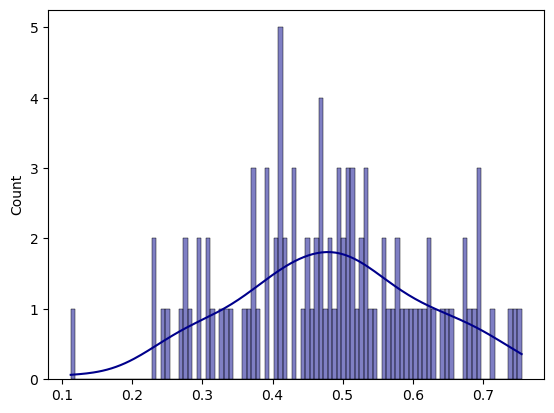

In [22]:
#Plot it along with the mean of the distribution
sns.histplot(means,kde=True,bins=100,color='darkblue') #Kernel density estimate smoothens the plot

In [24]:
# calculate the mean
mean=sum(means)/len(means)
mean

0.47992075978112014

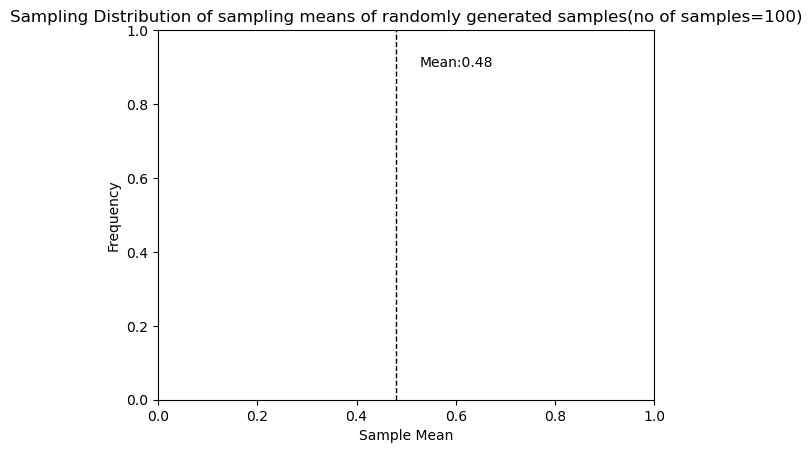

In [28]:
#Plot the mean over the distribution to get a sense of the central tendancy
plt.axvline(mean,linestyle='dashed',linewidth=1,color='k')
min_ylim,max_ylim=plt.ylim()
plt.text(mean*1.1,max_ylim*0.9,'Mean:{:.2f}'.format(mean))
plt.title("Sampling Distribution of sampling means of randomly generated samples(no of samples=100)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

<Axes: ylabel='Count'>

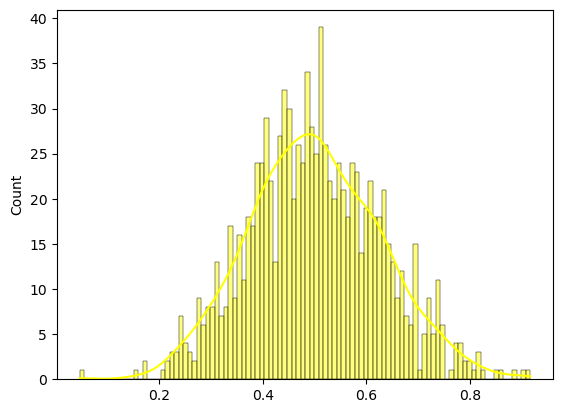

In [30]:
# for 1000 times
means=[]
for i in range(1000):
    #generate a random array of 5 values, with values between 0 and 1
    arr=np.random.rand(5)
    #calculate mean of random sample
    s_mean=np.mean(arr)
    # add s_mean to mean
    means.append(s_mean)
#Plot it along with the mean of the distribution
sns.histplot(means,kde=True,bins=100,color='yellow') #Kernel density estimate smoothens the plot

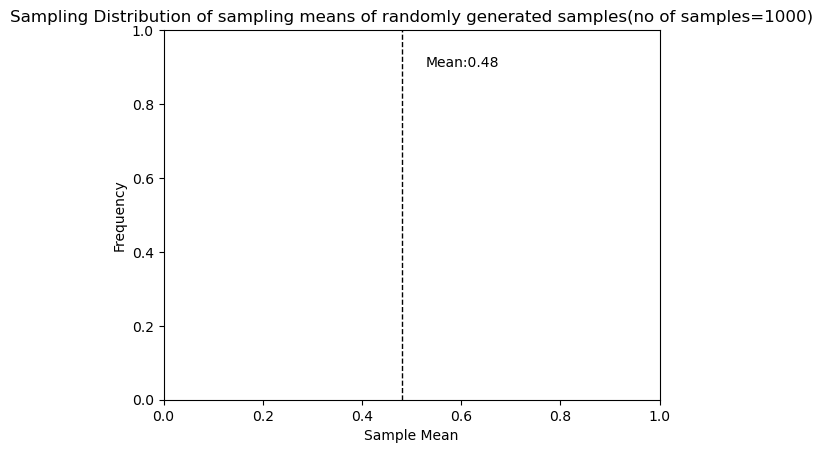

In [32]:
#Plot the mean over the distribution to get a sense of the central tendancy
plt.axvline(mean,linestyle='dashed',linewidth=1,color='k')
min_ylim,max_ylim=plt.ylim()
plt.text(mean*1.1,max_ylim*0.9,'Mean:{:.2f}'.format(mean))
plt.title("Sampling Distribution of sampling means of randomly generated samples(no of samples=1000)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

<Axes: ylabel='Count'>

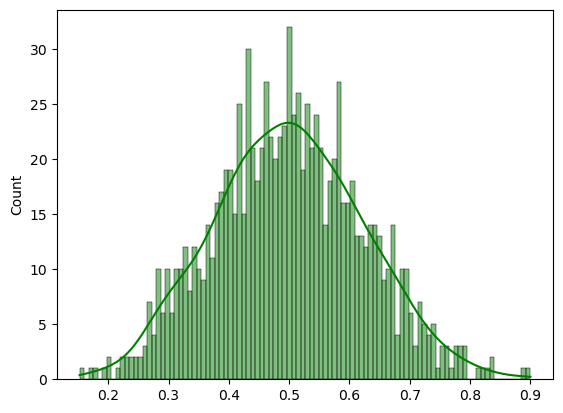

In [31]:
# for 10000 times
means=[]
for i in range(1000):
    #generate a random array of 5 values, with values between 0 and 1
    arr=np.random.rand(5)
    #calculate mean of random sample
    s_mean=np.mean(arr)
    # add s_mean to mean
    means.append(s_mean)
#Plot it along with the mean of the distribution
sns.histplot(means,kde=True,bins=100,color='green') #Kernel density estimate smoothens the plot

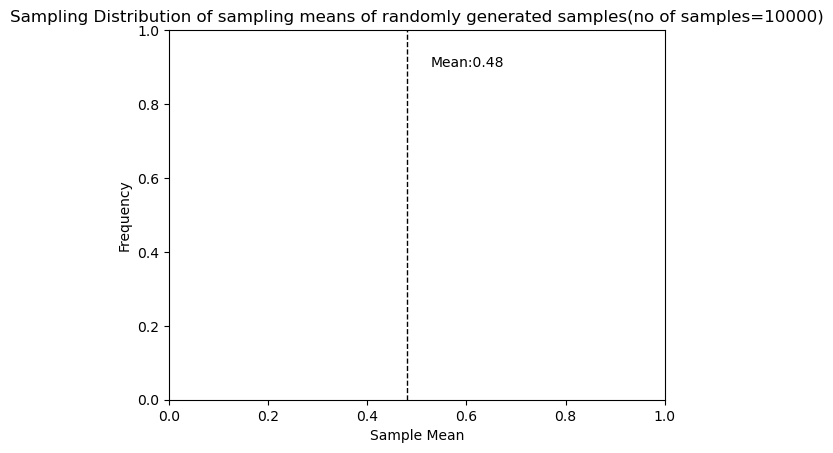

In [33]:
#Plot the mean over the distribution to get a sense of the central tendancy
plt.axvline(mean,linestyle='dashed',linewidth=1,color='k')
min_ylim,max_ylim=plt.ylim()
plt.text(mean*1.1,max_ylim*0.9,'Mean:{:.2f}'.format(mean))
plt.title("Sampling Distribution of sampling means of randomly generated samples(no of samples=10000)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

## T-Test

In [35]:
import numpy as np
from scipy import stats

In [36]:
data=np.array([11.8,11.7,11.2,11.9,11.5,12.1,12.0,11.8,11.6,12.2,11.9,11.7,12.0,11.8,11.6,11.7,11.9,11.5,12.1,12.0])
population_mean=12.0  #Hypothesized mean
alpha=0.05

In [41]:
data.shape

(20,)

In [37]:
t_statistic,p_value=stats.ttest_1samp(data,population_mean)
if p_value<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


In [40]:
print(f"t_statistic: {t_statistic}")
print(f"p-value: {p_value}")

t_statistic: -3.651483716701093
p-value: 0.0016973883620903581


# T-Test

In [47]:
from scipy.stats import ttest_ind #just the ttest from scipy.stats
from scipy.stats import probplot
import pylab

In [48]:
shoes=pd.read_csv("women_shoe_prices.csv")

/tmp/ipykernel_5073/928395860.py:1: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  shoes=pd.read_csv("women_shoe_prices.csv")


In [49]:
shoes.shape

(33801, 52)

In [50]:
shoes.sample(5)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
656,AVpe4mXyilAPnD_xQCI9,NaN,Soda,"Women's Casual Shoes,Shoes,Women's Boots,Women...",Tan,NaN,2016-01-15T17:26:29Z,2016-03-19T12:47:53Z,NaN,NaN,...,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8123,AVpfIV3vLJeJML433B2K,NaN,Bellini,"Boots On Sale,Shoes,Women's Shoes,Boots",NaN,NaN,2017-01-21T16:43:59Z,2017-03-28T11:42:56Z,"[{""dateSeen"":[""2017-03-25T12:15:33.607Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Clo...",https://www.overstock.com/Clothing-Shoes/Women...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30129,AVsUuaW3QMlgsOJE7G03,NaN,Fergalicious,"Flats,Shoes,Women's Shoes",NaN,NaN,2017-03-28T11:42:42Z,2017-03-28T11:42:42Z,"[{""dateSeen"":[""2017-03-25T12:06:56.942Z""],""sou...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Clo...",https://www.overstock.com/Clothing-Shoes/Women...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,AVpe9AeC1cnluZ0-anYf,NaN,Beacon,"Shoes,Clothing,Women's Shoes,All Women's Shoes",NaN,NaN,2016-11-04T11:47:18Z,2016-11-04T11:47:18Z,"[{""dateSeen"":[""2016-11-04T11:47:18Z""],""sourceU...",NaN,...,NaN,https://www.walmart.com/ip/Beacon-Kinsey-Women...,7.587560e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22359,AVpi9vO3LJeJML43qrOR,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing,Novica...",Black,NaN,2016-03-07T07:27:25Z,2017-03-02T16:48:51Z,"[{""dateSeen"":[""2017-03-25T17:37:47.833Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#introduce a new column for avg prices for the min price and max price
shoes["midprices"]=(shoes["prices.amountMax"]+shoes["prices.amountMin"])/2

In [ ]:
#plot a qqplot to check normality. If the variable is normally distributed, most of the points should be along 
#the center diagonal

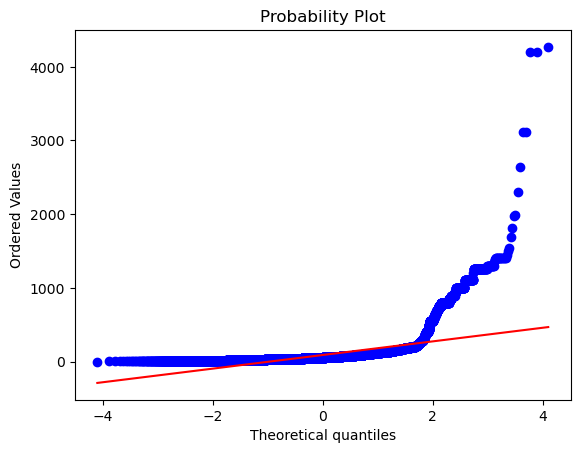

In [52]:
probplot(shoes["midprices"],dist="norm",plot=pylab)
plt.show()

In [53]:
# There are few outliers especially for the higher spectrum of shoe prices as expected
# NOw conduct Independent T-test
pink=shoes[shoes.colors=="Pink"]
notpink=shoes[shoes.colors!="Pink"]

In [56]:
print(ttest_ind(pink.midprices,notpink.midprices,equal_var=False))

Ttest_indResult(statistic=-9.765333304558089, pvalue=9.890604434815107e-20)


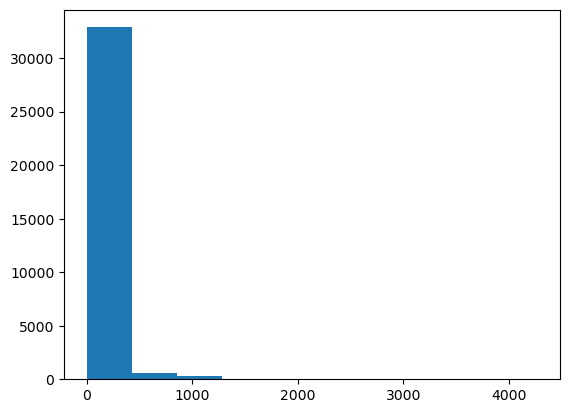

In [57]:
# There is a significant price difference between pink shoes and non pink shoes as the p value is very small
#Something else now
plt.hist(shoes['midprices'])
plt.show()

In [58]:
# Let's see if there is a difference if we limit to the price of the shoes to under 300
shoesreducd=shoes[shoes.midprices<300]

In [61]:
entries_removed=shoes.shape[0]-shoesreducd.shape[0]
print("Removed shoes that are under 300: %d \n" %entries_removed)

Removed shoes that are under 300: 1129 



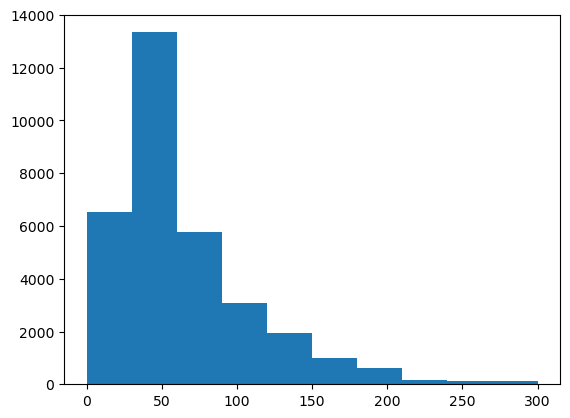

In [62]:
shoes=shoes[shoes.midprices<300]
plt.hist(shoes['midprices'])
plt.show()

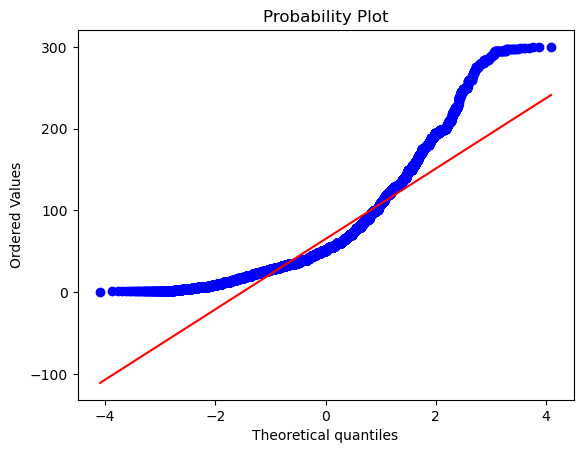

In [63]:
# Plot a qqplot to check normality. If the variable is normally distributed, most of the points should be along the 
#center diagonal
probplot(shoes["midprices"],dist="norm",plot=pylab)
plt.show()

In [65]:
# the graph is now closer to the straight line - which is more closer to a normal distribution curve
pink=shoes[shoes.colors=="Pink"]
notpink=shoes[shoes.colors!="Pink"]

In [66]:
print(ttest_ind(pink.midprices,notpink.midprices,equal_var=False))
# the p value is still under 0.01 which shows there is significant difference that pink shoes are different price
#to other shoes

Ttest_indResult(statistic=-6.536695383829033, pvalue=3.0484470604648535e-10)


# One Way ANOVA

In [67]:
# 2 Group's take 2 Sample T-Test
# more than 2 Group's Take ANOVA Test (It is extnsion of 2 Sample T-Test)

In [ ]:
# Mean of all Group's
# Grand Mean of (Mean of all group's)

In [68]:

from scipy.stats import f_oneway
# 3 Groups Example (Teaching Methods A,B, and C)
method_A=[85,88,91,78,82]
method_B=[75,79,80,82,78]
method_C=[90,85,88,92,87]

#Perform one-way ANOVA
f_statistics,p_value=f_oneway(method_A,method_B,method_C)

In [70]:
# Print the results
print("F-statistics:",f_statistics)
print("P-value: ",p_value)

F-statistics: 8.886649874055415
P-value:  0.004286725334093986


In [71]:
# Interpret the results
alpha=0.05 # Significance Level
if p_value<alpha:
    print("Reject the Null Hypothesis: There are significant differences in the means")
else:
    print("Fail to Reject the Null Hypothesis: No significant differences in the means")

Reject the Null Hypothesis: There are significant differences in the means
